# Signature Examples

In [1]:
from clustergrammer2 import Network, CGM2
import pandas as pd
df = {}

>> clustergrammer2 backend version 0.16.0


In [2]:
net = Network(CGM2)

In [3]:
df['data'] = pd.read_csv('rc_two_cat_clean.csv', index_col=0)
df['meta_col'] = pd.read_csv('meta_col.csv', index_col=0)
df['data'].shape

(38, 29)

In [4]:
df['data'].head()

,H1650,H23,CAL-12T,H358,H1975,HCC15,H1355,HCC827,H2405,HCC78,...,H460,H2106,H441,H1944,H1437,H1734,LOU-NH91,HCC44,A549,H1781
CDK4,-0.792804,0.527687,0.000623,0.356723,0.933286,-0.131729,0.808452,4.240885,-0.540231,-0.981457,...,0.342635,-0.430912,-0.405906,0.199564,-1.122536,2.210335,0.405126,-0.089763,0.405126,0.340013
LMTK3,0.177621,-0.016061,5.422114,1.307040,0.355815,0.276905,0.483154,-0.240496,1.336446,1.149619,...,-0.669037,-0.449242,1.158930,0.511962,2.370834,0.262894,-0.513129,-0.501210,0.439278,-0.342461
LRRK2,-0.697876,-0.555610,-0.360498,-0.460237,-0.680761,-0.169464,1.715709,-0.517105,0.184988,0.810660,...,-0.377854,-0.713473,-0.377609,4.308905,-0.638132,-0.556114,-0.318146,-0.489583,1.677377,-0.682790
UHMK1,0.850547,-0.263280,0.179253,0.398647,1.537664,0.505291,0.902366,-0.166288,0.630731,0.399448,...,0.283222,-4.243974,0.718316,1.747344,-1.020927,0.305029,1.471746,0.048902,-0.255284,0.548225
EGFR,1.412416,0.018988,0.902252,-0.178137,0.781819,0.211816,-0.023427,3.557296,1.173784,-0.012362,...,-0.486159,-1.451838,0.371238,-0.581665,-0.126356,0.241005,1.065269,0.974532,0.668645,0.056965


In [5]:
df['meta_col'].head()

,Category,Gender
H1650,two,Male
H23,two,Male
CAL-12T,two,Male
H358,one,Male
H1975,two,Female


In [6]:
col_cats = ['Category', 'Gender']

In [7]:
df['meta_cat_col'] = pd.DataFrame()
df['meta_cat_col'].loc['Cat', 'color'] = 'red'
df['meta_cat_col'].loc['Dog', 'color'] = 'yellow'
df['meta_cat_col'].loc['Shark', 'color'] = 'black'
df['meta_cat_col'].loc['Snake', 'color'] = 'blue'
df['meta_cat_col'].loc['Lizard', 'color'] = 'green'
df['meta_cat_col']

,color
Cat,red
Dog,yellow
Shark,black
Snake,blue
Lizard,green


In [8]:
n1 = Network(CGM2)
n1.load_df(df['data'], meta_col=df['meta_col'], col_cats=col_cats)
n1.set_global_cat_colors(df['meta_cat_col'])
n1.set_manual_category(col='Category', preferred_cats=df['meta_cat_col'])
n1.widget()

CGM2(manual_cat='{"col": {"col_cat_colors": {"Category: five": "#393b79", "Category: four": "#ff7f0e", "Catego…

In [9]:
df['sig'], df['diff'] = net.generate_signatures(df['data'], df['meta_col'], 'Category', num_top_dims=50)

In [10]:
df['sig'].shape

(38, 5)

In [11]:
df['diff'].keys()

dict_keys(['five', 'four', 'one', 'three', 'two'])

In [12]:
# df['diff']['five'].head()

In [13]:
df['sig'].index.name

In [14]:
n2 = Network(CGM2)
n2.load_df(df['sig'])
n2.widget()

CGM2(network='{"row_nodes": [{"name": "AAK1", "ini": 38, "clust": 18, "rank": 19, "rankvar": 13}, {"name": "CA…

Could save this dataframe

In [15]:
df['diff']['five'].head()

,P-values,BH P-values,Log2 Fold Change,Cluster Mean,All Other Mean
SRC,0.014085,0.258497,NaN,-0.418963,0.321980
CDK4,0.029843,0.258497,NaN,-0.220278,0.544748
PDK4,0.034065,0.258497,NaN,-0.397564,0.351082
SRPK3,0.052054,0.258497,NaN,-0.563818,0.019390
GRK4,0.054189,0.258497,2.51198,-0.737275,-0.129255


In [16]:
df['sig'].shape

(38, 5)

In [17]:
df['meta_col'].head()

,Category,Gender
H1650,two,Male
H23,two,Male
CAL-12T,two,Male
H358,one,Male
H1975,two,Female


# Predict

In [18]:
df['sim'] = net.predict_cats_from_sigs(df['data'], df['meta_col'], df['sig'], predict='Prediction', unknown_thresh=-1)

In [19]:
df['sim'].head()

,H1650,H23,CAL-12T,H358,H1975,HCC15,H1355,HCC827,H2405,HCC78,...,H460,H2106,H441,H1944,H1437,H1734,LOU-NH91,HCC44,A549,H1781
five,0.121167,0.036964,-0.110731,-0.107954,0.100290,-0.126095,-0.063123,0.029794,0.370141,0.501370,...,-0.160114,-0.281236,0.184263,0.083446,-0.216584,0.049588,0.445524,-0.021025,-0.094985,0.194000
four,-0.063141,0.054537,-0.026041,-0.126970,0.115162,0.058225,0.092505,0.135291,-0.104177,-0.064787,...,0.092061,0.439343,-0.050518,-0.051733,0.480398,-0.044320,-0.011915,0.196399,0.319996,-0.110086
one,0.226660,-0.008979,0.011027,0.526220,0.234505,-0.098671,-0.020071,0.717681,0.037199,0.295746,...,0.005295,-0.068144,0.699844,0.028312,-0.170840,0.733166,-0.053984,-0.060687,-0.045212,0.743316
three,-0.112177,0.140425,-0.004293,0.111011,0.259278,0.212176,0.540128,0.291518,-0.145957,-0.054862,...,0.574384,-0.260220,-0.066502,0.648816,0.185804,-0.050504,-0.050192,0.064952,0.525788,-0.014074
two,0.254211,0.469264,0.468497,0.177394,0.602618,0.552905,0.445596,0.151927,-0.116680,0.013736,...,-0.064721,-0.225310,0.099650,0.027130,0.186236,0.051429,0.018110,0.169236,0.183301,0.104978


In [20]:
df['meta_col']['Prediction-Sim'] = df['sim'].max(axis=0)

In [21]:
df['meta_col'].head()

,Category,Gender,Prediction,Prediction-Sim
H1650,two,Male,two,0.254211
H23,two,Male,two,0.469264
CAL-12T,two,Male,two,0.468497
H358,one,Male,one,0.526220
H1975,two,Female,two,0.602618


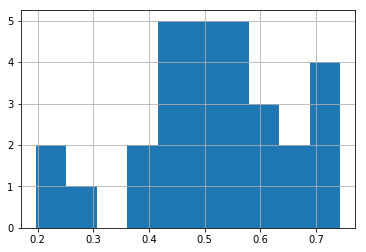

In [22]:
df['meta_col']['Prediction-Sim'].hist()

# Visualize Predictions

In [23]:
col_cats = ['Category', 'Prediction', 'Gender']

In [24]:
n1 = Network(CGM2)
n1.load_df(df['data'], meta_col=df['meta_col'], col_cats=col_cats)
n1.set_global_cat_colors(df['meta_cat_col'])
n1.set_manual_category(col='Category', preferred_cats=df['meta_cat_col'])
n1.widget()

CGM2(manual_cat='{"col": {"col_cat_colors": {"Category: five": "#393b79", "Category: four": "#ff7f0e", "Catego…

In [25]:
df['conf'], ser_correct, fraction_correct = n2.assess_prediction(df['meta_col'], 'Category', 'Prediction')

In [26]:
ser_correct

five     1.000000
four     0.857143
one      1.000000
three    1.000000
two      1.000000
dtype: float64

In [27]:
fraction_correct

0.9655172413793104

In [28]:
net.load_df(df['conf'])
net.widget()

CGM2(network='{"row_nodes": [{"name": "five", "ini": 5, "clust": 3, "rank": 1, "rankvar": 3}, {"name": "four",…